In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import seaborn as sns

In [86]:
df_train = pd.read_csv("../../data/train.csv")
df_test = pd.read_csv("../../data/submission.csv")

In [87]:
# # ID : Information Display 사업부문
# # COHA : 사업영역이 Corporate/Office, Hotel/Accommodation
# # COEHA : 사업영역이 Corporate/Office, Education, Hotel/Accommodation
# # EC : End-Customer, End-User
# # CORHA : 사업영역이 Corporate/Office, Retail, Hotel/Accommodation
# # D : Display


# train.rename(columns=({"bant_submit" : "답변비율",
#                        "customer_country" : "고객국적",
#                        "business_unit" : "사업부",
#                        "com_reg_ver_win_rate" : "기회비율",
#                        "customer_idx" : "고객회사명",
#                        "customer_type" : "고객유형",
#                        "enterprise" : "기업유형",
#                        "historical_existing_cnt" : "이전영업전환횟수",
#                        "id_strategic_ver" : "ID-COHA여부",
#                        "it_strategic_ver" : "IT-COHA여부",
#                        "idit_strategic_ver" : "ID&IT-COHA여부",
#                        "customer_job" : "고객직업군",
#                        "lead_desc_length" : "잠재고객답변길이",
#                        "inquiry_type" : "고객문의유형",
#                        "product_category" : "요청제품분류",
#                        "product_subcategory" : "요청제품하위분류",
#                        "product_modelname" : "요청제품모델명",
#                        "customer_country.1" : "담당자사지역정보",
#                        "customer_position" : "고객회사직책",
#                        "response_corporate" : "담당자사법인명",
#                        "expected_timeline" : "요청처리일정",
#                        "ver_cus" : "COEHAR-EC여부",
#                        "ver_pro" : "CORHA-D여부",
#                        "ver_win_rate_x" : "사업영역별전환성공비율",
#                        "ver_win_ratio_per_bu" : "사업영역별-AS,ID,Sol부문성공전환비율",
#                        "business_area" : "고객사업영역",
#                        "business_subarea" : "고객사업영역-세부",
#                        "lead_owner" : "영업담당자",
#                        "is_converted" : "영업성공여부"}), inplace=True)

In [88]:
# # ID : Information Display 사업부문
# # COHA : 사업영역이 Corporate/Office, Hotel/Accommodation
# # COEHA : 사업영역이 Corporate/Office, Education, Hotel/Accommodation
# # EC : End-Customer, End-User
# # CORHA : 사업영역이 Corporate/Office, Retail, Hotel/Accommodation
# # D : Display


# test.rename(columns=({"bant_submit" : "답변비율",
#                        "customer_country" : "고객국적",
#                        "business_unit" : "사업부",
#                        "com_reg_ver_win_rate" : "기회비율",
#                        "customer_idx" : "고객회사명",
#                        "customer_type" : "고객유형",
#                        "enterprise" : "기업유형",
#                        "historical_existing_cnt" : "이전영업전환횟수",
#                        "id_strategic_ver" : "ID-COHA여부",
#                        "it_strategic_ver" : "IT-COHA여부",
#                        "idit_strategic_ver" : "ID&IT-COHA여부",
#                        "customer_job" : "고객직업군",
#                        "lead_desc_length" : "잠재고객답변길이",
#                        "inquiry_type" : "고객문의유형",
#                        "product_category" : "요청제품분류",
#                        "product_subcategory" : "요청제품하위분류",
#                        "product_modelname" : "요청제품모델명",
#                        "customer_country.1" : "담당자사지역정보",
#                        "customer_position" : "고객회사직책",
#                        "response_corporate" : "담당자사법인명",
#                        "expected_timeline" : "요청처리일정",
#                        "ver_cus" : "COEHAR-EC여부",
#                        "ver_pro" : "CORHA-D여부",
#                        "ver_win_rate_x" : "사업영역별전환성공비율",
#                        "ver_win_ratio_per_bu" : "사업영역별-AS,ID,Sol부문성공전환비율",
#                        "business_area" : "고객사업영역",
#                        "business_subarea" : "고객사업영역-세부",
#                        "lead_owner" : "영업담당자",
#                        "is_converted" : "영업성공여부"}), inplace=True)

In [89]:
df_train["customer_position"].unique()

array(['entry level', 'ceo/founder', 'partner', 'manager',
       'vice president', 'associate/analyst', 'c-level executive', 'none',
       'director', 'other', 'intern', 'trainee', 'others',
       'this is a consume display requirement for home purpose.',
       'vicepresident', 'consulting', 'entrylevel', 'c-levelexecutive',
       'unpaid', 'physics teacher', 'assistant professor',
       'av management', 'maths lecturer', 'founder', 'engineering',
       'installer', 'homeowner', 'consultant', 'commercial end-user',
       'employee', 'bulgaria', 'lider de desarrollo', 'administrative',
       'entrepreneurship', 'decision-influencer', 'decision maker',
       'customer', 'not applicable', 'decision-maker', 'no influence',
       'commercial consultant', 'science teacher', 'decision influencer',
       'technical', 'architecture/consult', 'architect/consultant',
       'exhibition', 'hospital', 'end-user', 'government', 'manufacturer',
       'software /solution provider', 'syste

In [90]:
df_test["customer_position"].unique()

array(['none', 'manager', 'others', 'associate/analyst', 'director',
       'entry level', 'ceo/founder', 'partner', 'c-level executive',
       'trainee', 'vice president', 'intern', 'educator', 'other',
       'customer',
       'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)',
       'assistant professor', 'math and physics teacher', 'pgt chemistry',
       'director cum faculty at gaining apex coaching centre',
       'professor', 'co-founder', 'asst prof.'], dtype=object)

In [91]:
# # customer_position
# # CEO / Founder
# change_list = ['ceo/founder', 'ceo/fundador', 'founder', 'entrepreneurship']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'ceo / founder'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'ceo / founder'
# # C-Level Executive
# change_list = ['president',  'the big boss', 'chairman', 'chief executive officer', 'c-level executive', 'co-founder', 'co-founder', 'c-levelexecutive', 'leadership/executive office/owner', 'administrative'
#                , 'decision maker', 'decision-maker',  'commercial consultant', 'decision influencer', 'decision-influencer']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'c-level executive'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'c-level executive'
# # Vice President
# change_list = ['vp', 'vice president', 'vicepresident']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'vice president'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'vice president'
# # Partner
# change_list = ['partner', 'business partner']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'partner'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'partner'
# # Director
# change_list = ['principal & director', 'director cum faculty at gaining apex coaching centre', 'business unit director', 'director']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'director'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'director'
# # Manager
# change_list = ['av management', 'manager',  'gerente']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'manager'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'manager'
# # Entry Level
# change_list = ['entry level', 'entrylevel']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'entry level'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'entry level'
# # Others
# change_list = ['other - please specify - cedia association', 'others', 'other']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'others'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'others'
# # Educator
# change_list = ['chemistry teacher', 'education professional', 'education', 'teacher', 'senior lecturer', 'science teacher',  'educator', 
# 'physics and mathematics teacher', 'physics teacher', 'maths lecturer', 'professor of mathematics', 'guest faculty', 'physics faculty', 'math and physics teacher' 
# 'english trainer for ielts,toefl,pte,gre,sat exams.', 'academic specialist', 'neet/ olympiad expert faculty', 'quantitative aptitude faculty', 'professional trainer', 
# 'associate professor in electronics engg', 'prof.', 'professor', 'asst prof.', 'associate professor', 'assistant professor of enlish', 'assistant professor'
# , 'career coach', 'teacher/middle school coordinator', 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)', 'hon dean', 
# 'principal at oxford integrated pu science college','educator', 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)', 'assistant professor', 
# 'math and physics teacher', 'professor', 'pgt chemistry',  'asst prof.',  'english trainer for ielts,toefl,pte,gre,sat exams.']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'educator'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'educator'
# # Customer
# change_list = ['end-user', 'customer', 'commercial end-user']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'end-user'
#     df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'end-user'
# # Error
# change_list = ['manufacturer',  'medical device manufacturer', 'pathologist', 'research', 
# 'market intelligence/research', 'not applicable', 'unpaid', 'manufacture', 'técnico',  'technical', 'engineering', 
# 'installer', 'hospital', 'tierarzt', 'surgery professional', 'radiology professional', 'főorvos', 'hospital', 'medical imaging specialist', 
# 'cargo', 'business development/sales', 'sales', 'subsidiary sales (ise)', 'consultant', 'consulting', 'architecture/consult', 'architect/consultant', 
# 'exhibition', 'distributor', 'operations', 'government', 'system integrator', 'business development', 'research', 'homeowner', 'lider de desarrollo', 
# 'software /solution provider', 'product management', 'employee']
# for item in change_list:
#     df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'none'

# # 완전한 이상치 데이터 제거
# delete_list = ['bulgaria', 'genel müdür', 'proprietário(a)', 'mindenes', 'pgt physics', 'exhibitiontv','no influence','this is a consume display requirement for home purpose.']
# for item in delete_list:
#     df_train = df_train[df_train['customer_position'] != item]

In [92]:
## customer_position
# CEO / Founder
change_list = ['ceo/founder', 'ceo/fundador', 'founder', 'entrepreneurship']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'ceo / founder'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'ceo / founder'
# C-Level Executive
change_list = ['president',  'the big boss', 'chairman', 'chief executive officer', 'c-level executive', 'co-founder', 'co-founder', 'c-levelexecutive', 'leadership/executive office/owner', 'administrative'
               , 'decision maker', 'decision-maker',  'commercial consultant', 'decision influencer', 'decision-influencer']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'c-level executive'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'c-level executive'
# Vice President
change_list = ['vp', 'vice president', 'vicepresident']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'vice president'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'vice president'
# Partner
change_list = ['partner', 'business partner']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'partner'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'partner'
# Director
change_list = ['principal & director', 'director cum faculty at gaining apex coaching centre', 'business unit director', 'director']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'director'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'director'
# Manager
change_list = ['av management', 'manager',  'gerente']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'manager'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'manager'
# Entry Level
change_list = ['entry level', 'entrylevel']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'entry level'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'entry level'
# Others
change_list = ['other - please specify - cedia association', 'others', 'other']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'others'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'others'
# Educator
change_list = ['chemistry teacher', 'education professional', 'education', 'teacher', 'senior lecturer', 'science teacher',  'educator', 
'physics and mathematics teacher', 'physics teacher', 'maths lecturer', 'professor of mathematics', 'guest faculty', 'physics faculty', 'math and physics teacher' 
'english trainer for ielts,toefl,pte,gre,sat exams.', 'academic specialist', 'neet/ olympiad expert faculty', 'quantitative aptitude faculty', 'professional trainer', 
'associate professor in electronics engg', 'prof.', 'professor', 'asst prof.', 'associate professor', 'assistant professor of enlish', 'assistant professor'
, 'career coach', 'teacher/middle school coordinator', 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)', 'hon dean', 
'principal at oxford integrated pu science college','educator', 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)', 'assistant professor', 
'math and physics teacher', 'professor', 'pgt chemistry',  'asst prof.',  'english trainer for ielts,toefl,pte,gre,sat exams.']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'educator'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'educator'
# Customer
change_list = ['end-user', 'customer', 'commercial end-user']
for item in change_list:
    df_train.loc[df_train['customer_position'] == item, 'customer_position'] = 'end-user'
    df_test.loc[df_test['customer_position'] == item, 'customer_position'] =  'end-user'
# Error
change_list = ['manufacturer',  'medical device manufacturer', 'pathologist', 'research', 
'market intelligence/research', 'not applicable', 'unpaid', 'manufacture', 'técnico',  'technical', 'engineering', 
'installer', 'hospital', 'tierarzt', 'surgery professional', 'radiology professional', 'főorvos', 'hospital', 'medical imaging specialist', 
'cargo', 'business development/sales', 'sales', 'subsidiary sales (ise)', 'consultant', 'consulting', 'architecture/consult', 'architect/consultant', 
'exhibition', 'distributor', 'operations', 'government', 'system integrator', 'business development', 'research', 'homeowner', 'lider de desarrollo', 
'software /solution provider', 'product management', 'employee']
df_train = df_train[~df_train["customer_position"].isin(change_list)]

# 완전한 이상치 데이터 제거
delete_list = ['bulgaria', 'genel müdür', 'proprietário(a)', 'mindenes', 'pgt physics', 'exhibitiontv','no influence','this is a consume display requirement for home purpose.']
for item in delete_list:
    df_train = df_train[df_train['customer_position'] != item]

In [93]:
df_train["customer_position"].unique()

array(['entry level', 'ceo / founder', 'partner', 'manager',
       'vice president', 'associate/analyst', 'c-level executive', 'none',
       'director', 'others', 'intern', 'trainee', 'educator', 'end-user'],
      dtype=object)

In [94]:
df_test["customer_position"].unique()

array(['none', 'manager', 'others', 'associate/analyst', 'director',
       'entry level', 'ceo / founder', 'partner', 'c-level executive',
       'trainee', 'vice president', 'intern', 'educator', 'end-user'],
      dtype=object)

In [95]:
df_train[~df_train["customer_position"].isin(df_test["customer_position"].unique())]["customer_position"].unique()

array([], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'none'),
  Text(1, 0, 'manager'),
  Text(2, 0, 'others'),
  Text(3, 0, 'associate/analyst'),
  Text(4, 0, 'director'),
  Text(5, 0, 'entry level'),
  Text(6, 0, 'ceo / founder'),
  Text(7, 0, 'partner'),
  Text(8, 0, 'c-level executive'),
  Text(9, 0, 'trainee'),
  Text(10, 0, 'vice president'),
  Text(11, 0, 'intern'),
  Text(12, 0, 'educator'),
  Text(13, 0, 'end-user')])

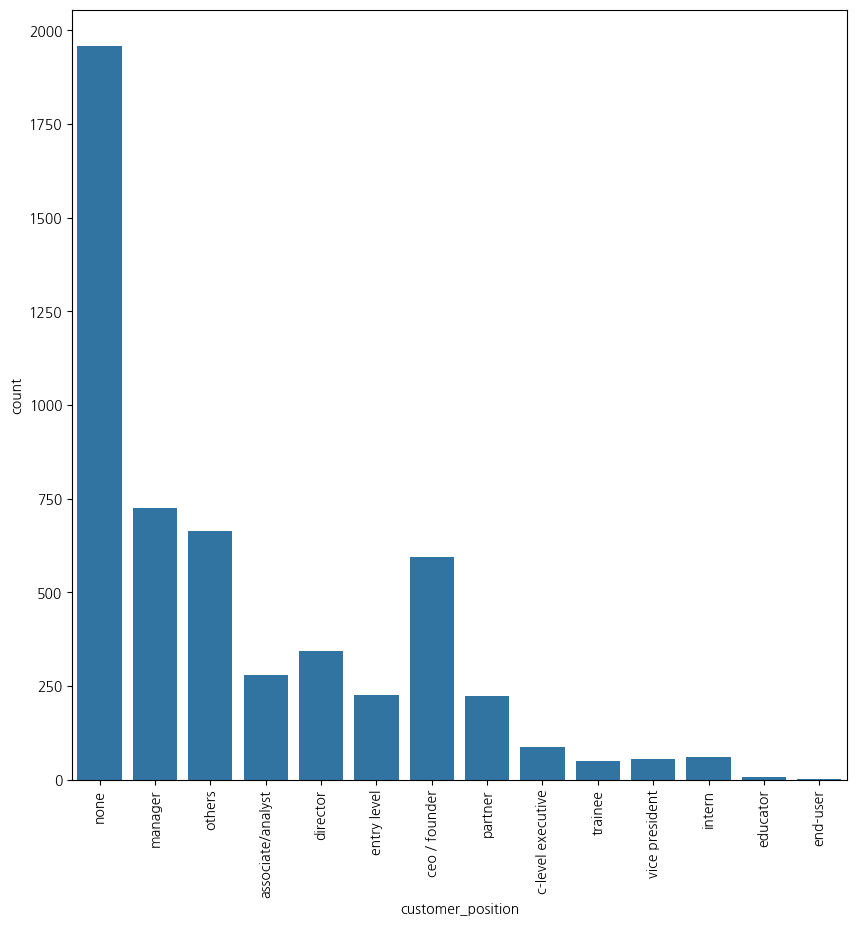

In [96]:
plt.figure(figsize=(10, 10))
sns.countplot(df_test, x="customer_position")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'entry level'),
  Text(1, 0, 'ceo / founder'),
  Text(2, 0, 'partner'),
  Text(3, 0, 'manager'),
  Text(4, 0, 'vice president'),
  Text(5, 0, 'associate/analyst'),
  Text(6, 0, 'c-level executive'),
  Text(7, 0, 'none'),
  Text(8, 0, 'director'),
  Text(9, 0, 'others'),
  Text(10, 0, 'intern'),
  Text(11, 0, 'trainee'),
  Text(12, 0, 'educator'),
  Text(13, 0, 'end-user')])

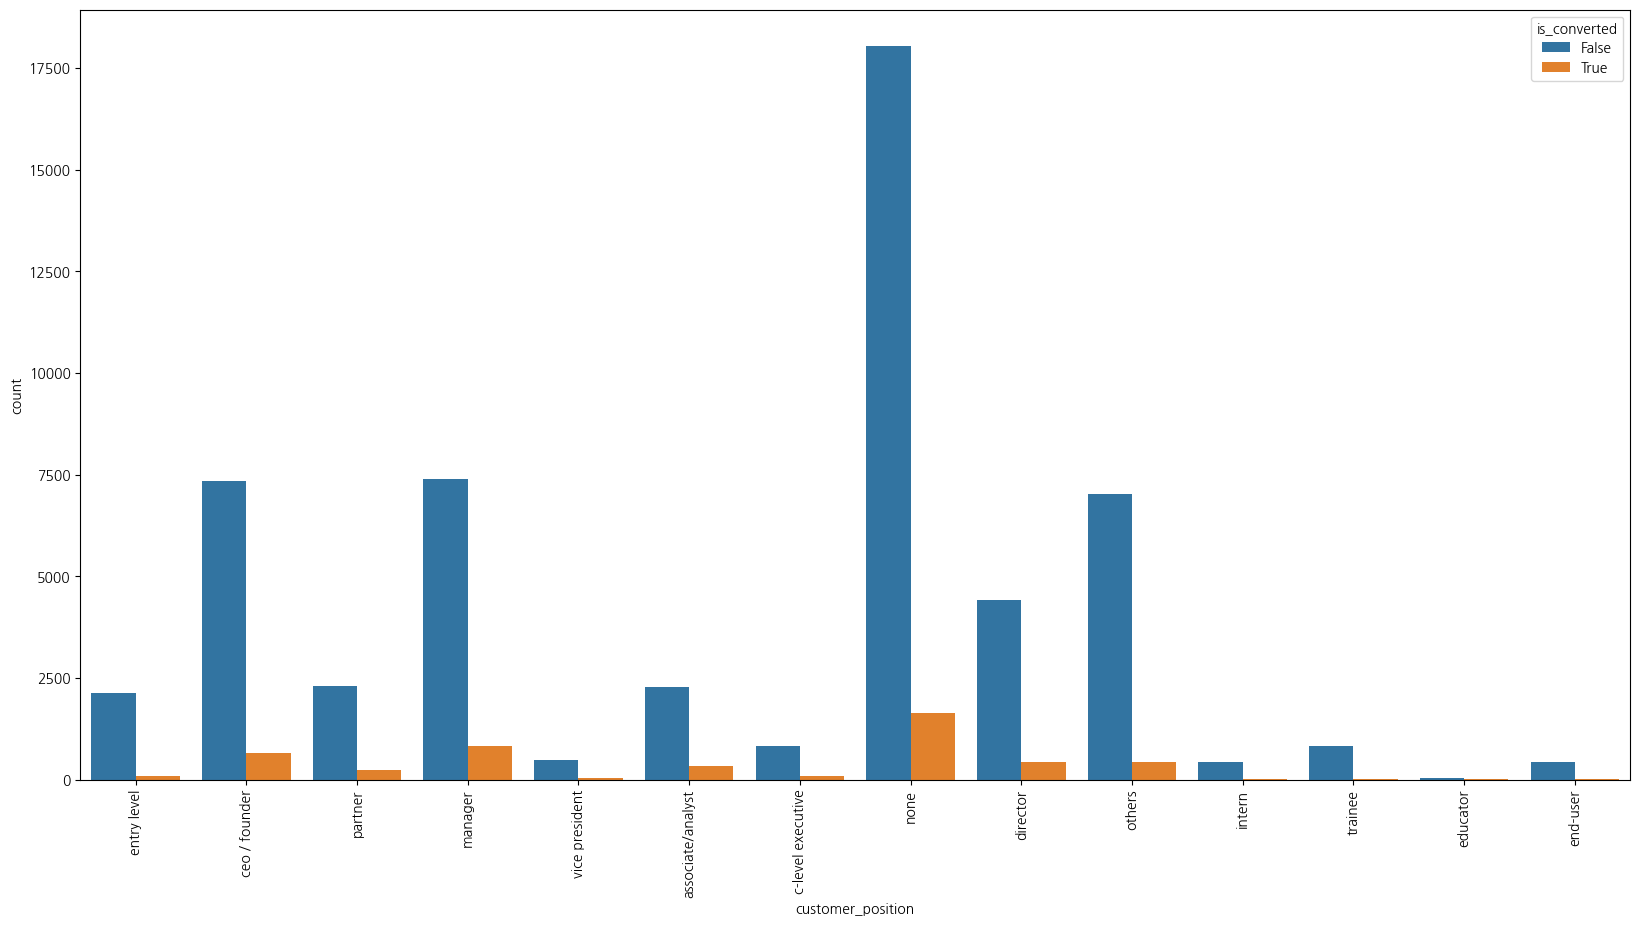

In [97]:
plt.figure(figsize=(20, 10))
sns.countplot(df_train, x="customer_position", hue="is_converted")
plt.xticks(rotation=90)

In [98]:
unique_true_num = df_train[df_train["customer_position"]=='entry level'][["customer_position", "is_converted"]].value_counts()
unique_true_num

customer_position  is_converted
entry level        False           2121
                   True              98
Name: count, dtype: int64

In [99]:
for i in df_train["customer_position"].unique():
    unique_num = df_train[df_train["customer_position"]==i]["customer_position"].value_counts().iloc[0]
    unique_true_num = df_train[df_train["customer_position"]==i][["customer_position", "is_converted"]].value_counts().iloc[1]
    unique_rate = unique_true_num/unique_num*100
    print(f"===={i}====")
    print()
    print(f"Number of {i} : {unique_num}")
    print(f"Number of {i} True : {unique_true_num}")
    print(f"Rate of {i} : {unique_rate : .3f} %")
    print()

====entry level====

Number of entry level : 2219
Number of entry level True : 98
Rate of entry level :  4.416 %

====ceo / founder====

Number of ceo / founder : 7991
Number of ceo / founder True : 658
Rate of ceo / founder :  8.234 %

====partner====

Number of partner : 2538
Number of partner True : 232
Rate of partner :  9.141 %

====manager====

Number of manager : 8222
Number of manager True : 826
Rate of manager :  10.046 %

====vice president====

Number of vice president : 521
Number of vice president True : 44
Rate of vice president :  8.445 %

====associate/analyst====

Number of associate/analyst : 2597
Number of associate/analyst True : 325
Rate of associate/analyst :  12.514 %

====c-level executive====

Number of c-level executive : 904
Number of c-level executive True : 88
Rate of c-level executive :  9.735 %

====none====

Number of none : 19680
Number of none True : 1649
Rate of none :  8.379 %

====director====

Number of director : 4847
Number of director True : 433

In [84]:
df_train[df_train["customer_idx"].isin(df_test["customer_idx"])]["customer_idx"]

14       16481
50       47466
57       13518
60       27671
113      28113
         ...  
59121    22446
59154    22520
59155    32240
59220    47466
59253    20702
Name: customer_idx, Length: 10663, dtype: int64